In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from fundus_data_toolkit.datamodules.classification import DDRDataModule, IDRiDDataModule, EyePACSDataModule, AptosDataModule
from fundus_data_toolkit.datamodules.utils import merge_existing_datamodules
from fundus_data_toolkit.datamodules import CLASSIF_PATHS, SEG_PATHS, register_paths, Task, USER_SETTING
from nntools import NNOpt

In [4]:
paths = {
'EYEPACS': '/home/clement/Documents/data/eyepacs/',
'APTOS': '/home/clement/Documents/data/aptos/',
'DDR': '/home/clement/Documents/data/DDR/DDR-dataset/DR_grading/',
'IDRID': '/home/clement/Documents/data/IDRID/B. Disease Grading/', 
}
register_paths(paths, task=Task.CLASSIFICATION)

{'classification_eyepacs': '/home/clement/Documents/data/eyepacs/', 'classification_aptos': '/home/clement/Documents/data/aptos/', 'classification_ddr': '/home/clement/Documents/data/DDR/DDR-dataset/DR_grading/', 'classification_idrid': '/home/clement/Documents/data/IDRID/B. Disease Grading/'}


/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


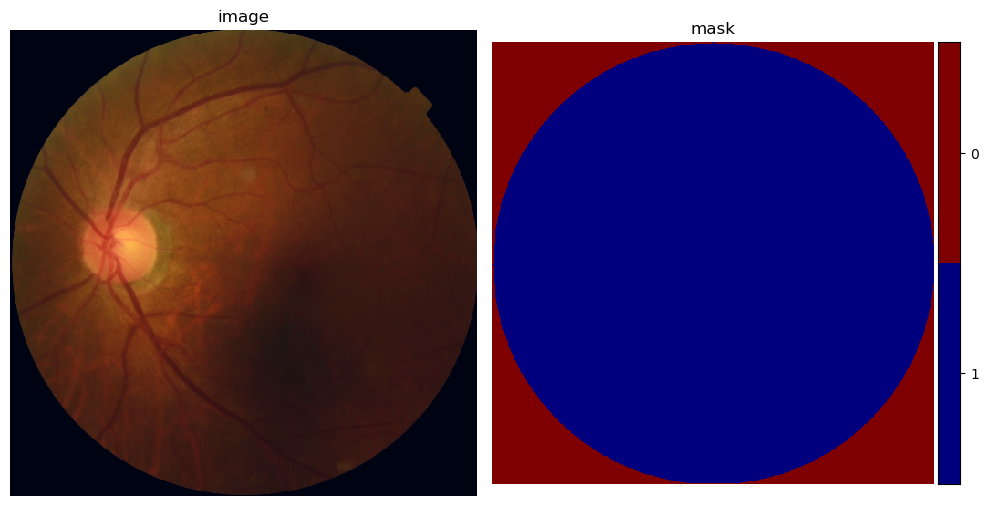

In [6]:
img_size = (512, 512)
idrid_datamodule = IDRiDDataModule(CLASSIF_PATHS.IDRID, img_size=img_size, batch_size=64, 
                                   valid_size=0.2,
                                   use_cache=True, num_workers=8,
                                   precise_autocrop=True,
                                   cache_option=NNOpt.CACHE_DISK).setup_all()
eyepacs_datamodule = EyePACSDataModule(CLASSIF_PATHS.EYEPACS, img_size=img_size, batch_size=64, use_cache=True, num_workers=8,
                                       precise_autocrop=True,
                                   cache_option=NNOpt.CACHE_DISK).setup_all()
aptos_datamodule = AptosDataModule(CLASSIF_PATHS.APTOS, img_size=img_size, batch_size=64, use_cache=True, num_workers=8,
                                   precise_autocrop=True,
                                   cache_option=NNOpt.CACHE_DISK).setup_all()
ddr_datamodule = DDRDataModule(CLASSIF_PATHS.DDR, img_size=img_size, batch_size=64, use_cache=True, num_workers=8,
                                   cache_option=NNOpt.CACHE_DISK, precise_autocrop=True).setup_all()
ddr_datamodule.train.plot(0)

In [14]:
datamodule = merge_existing_datamodules([idrid_datamodule, aptos_datamodule, ddr_datamodule, eyepacs_datamodule])

In [ ]:
from tqdm.notebook import tqdm
dataloaders = datamodule.train_dataloader()
for batch in tqdm(dataloaders, total=len(dataloaders)):
    pass

  0%|          | 0/63 [00:00<?, ?it/s]

In [15]:
dataloaders = datamodule.test_dataloader()

In [16]:
for d in dataloaders:
    print(d.dataset.id)

IDRID_test
DDR_test
EYEPACS_test
